In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
from scipy import stats

In [3]:
bmd = pd.read_csv('building_metadata.csv')

In [4]:
bmd.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [5]:
test_df = pd.read_csv('test.csv')

In [6]:
test_df.head()

,row_id,building_id,meter,timestamp
0,0,0,0,2017-01-01 00:00:00
1,1,1,0,2017-01-01 00:00:00
2,2,2,0,2017-01-01 00:00:00
3,3,3,0,2017-01-01 00:00:00
4,4,4,0,2017-01-01 00:00:00


In [7]:
train_df = pd.read_csv('train.csv')

In [8]:
train_df['building_id'].nunique()

1449

In [9]:
## Function to reduce the DF size
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [10]:
train_df = reduce_mem_usage(train_df)
test_df = reduce_mem_usage(test_df)

Mem. usage decreased to 289.19 Mb (53.1% reduction)
Mem. usage decreased to 596.49 Mb (53.1% reduction)


In [11]:
#Selecting largest building first

In [12]:
bmd['square_feet'].argmax()

869

In [13]:
bmd.iloc[869]

site_id                                    8
building_id                              869
primary_use    Entertainment/public assembly
square_feet                           875000
year_built                               NaN
floor_count                                1
Name: 869, dtype: object

In [14]:
new_df = train_df[train_df['building_id']==869]

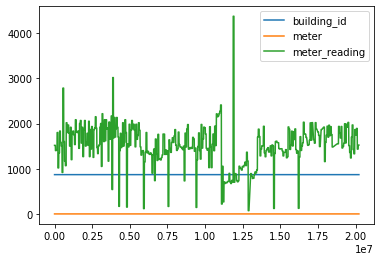

In [15]:
new_df.plot()

In [33]:
new_df.drop(['meter','building_id'], axis =1, inplace = True)

KeyError: "['meter' 'building_id'] not found in axis"

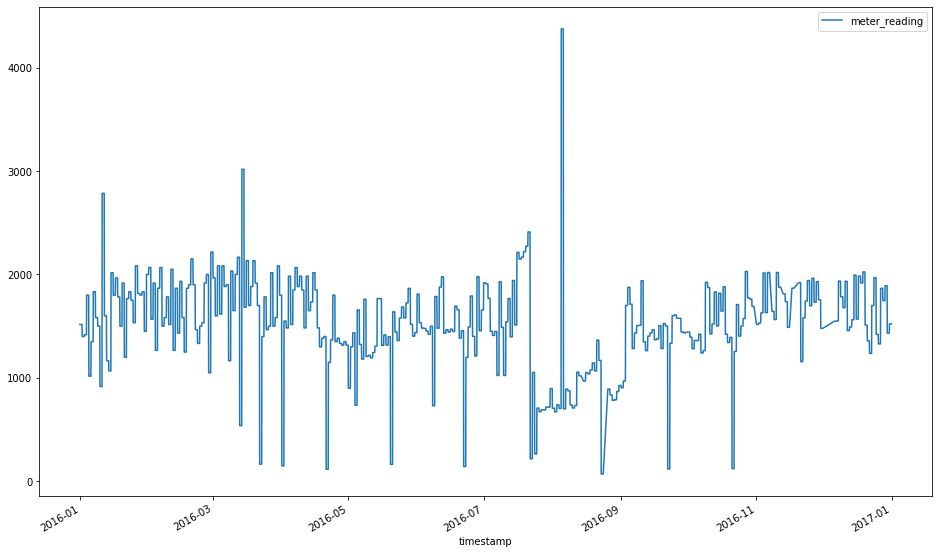

In [34]:
new_df.plot(figsize=(16,10))

In [18]:
new_df.index = new_df['timestamp']

In [19]:
new_df.index = pd.to_datetime(new_df.index)

In [20]:
new_df.index

DatetimeIndex(['2016-01-01 00:00:00', '2016-01-01 01:00:00',
               '2016-01-01 02:00:00', '2016-01-01 03:00:00',
               '2016-01-01 04:00:00', '2016-01-01 05:00:00',
               '2016-01-01 06:00:00', '2016-01-01 07:00:00',
               '2016-01-01 08:00:00', '2016-01-01 09:00:00',
               ...
               '2016-12-31 14:00:00', '2016-12-31 15:00:00',
               '2016-12-31 16:00:00', '2016-12-31 17:00:00',
               '2016-12-31 18:00:00', '2016-12-31 19:00:00',
               '2016-12-31 20:00:00', '2016-12-31 21:00:00',
               '2016-12-31 22:00:00', '2016-12-31 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=8447, freq=None)

In [21]:
new_df

,timestamp,meter_reading
timestamp,,
2016-01-01 00:00:00,2016-01-01 00:00:00,1517.040039
2016-01-01 01:00:00,2016-01-01 01:00:00,1517.040039
2016-01-01 02:00:00,2016-01-01 02:00:00,1517.040039
2016-01-01 03:00:00,2016-01-01 03:00:00,1517.040039
2016-01-01 04:00:00,2016-01-01 04:00:00,1517.040039
...,...,...
2016-12-31 19:00:00,2016-12-31 19:00:00,1522.709961
2016-12-31 20:00:00,2016-12-31 20:00:00,1522.709961
2016-12-31 21:00:00,2016-12-31 21:00:00,1522.709961


In [22]:
new_df.drop('timestamp', axis =1, inplace = True)

C:\Users\Peter\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
new_df.head()

,meter_reading
timestamp,
2016-01-01 00:00:00,1517.040039
2016-01-01 01:00:00,1517.040039
2016-01-01 02:00:00,1517.040039
2016-01-01 03:00:00,1517.040039
2016-01-01 04:00:00,1517.040039


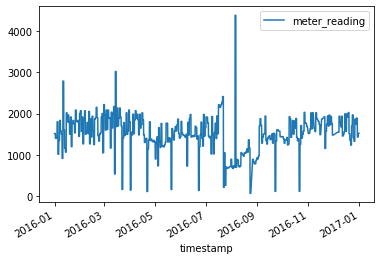

In [24]:
new_df.plot()

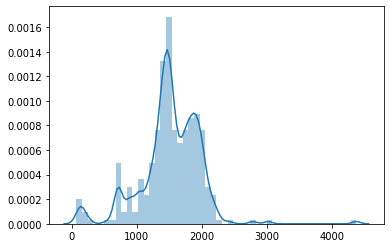

In [25]:
sns.distplot(new_df)

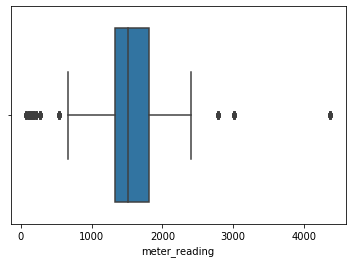

In [26]:
sns.boxplot(x=new_df['meter_reading'])

In [27]:
'''#Cleaning data
#Using Z-score, filtered from -3 to +3
z_scores = np.abs(stats.zscore(new_df))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 0.05).all(axis=1)

filtered_entries
filt_df = new_df[filtered_entries]'''

'#Cleaning data\n#Using Z-score, filtered from -3 to +3\nz_scores = np.abs(stats.zscore(new_df))\nabs_z_scores = np.abs(z_scores)\nfiltered_entries = (abs_z_scores < 0.05).all(axis=1)\n\nfiltered_entries\nfilt_df = new_df[filtered_entries]'

In [28]:
new_df.dropna(inplace=True)

C:\Users\Peter\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


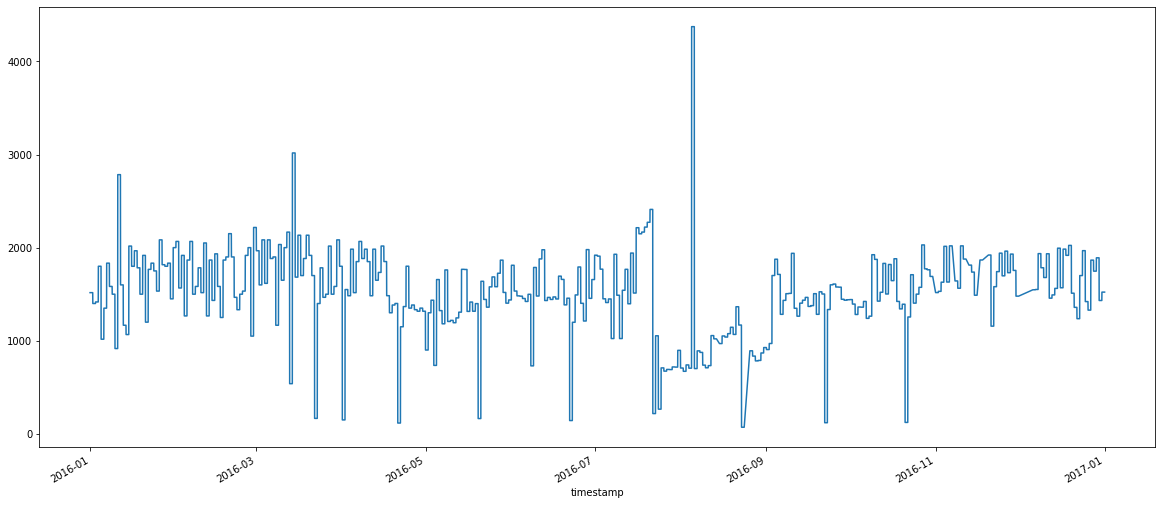

In [29]:
new_df['meter_reading'].plot(figsize=(20,9))

In [30]:
new_df

,meter_reading
timestamp,
2016-01-01 00:00:00,1517.040039
2016-01-01 01:00:00,1517.040039
2016-01-01 02:00:00,1517.040039
2016-01-01 03:00:00,1517.040039
2016-01-01 04:00:00,1517.040039
...,...
2016-12-31 19:00:00,1522.709961
2016-12-31 20:00:00,1522.709961
2016-12-31 21:00:00,1522.709961


In [31]:
train_df

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.000000
1,1,0,2016-01-01 00:00:00,0.000000
2,2,0,2016-01-01 00:00:00,0.000000
3,3,0,2016-01-01 00:00:00,0.000000
4,4,0,2016-01-01 00:00:00,0.000000
...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750000
20216096,1445,0,2016-12-31 23:00:00,4.825000
20216097,1446,0,2016-12-31 23:00:00,0.000000
20216098,1447,0,2016-12-31 23:00:00,159.574997
